# Liveability scoring
Liveability score is essential to measure the importance of various factors consisted of liveability.
<br>
In this project, it is decided to use customized weights by conducting user survey via web service and scoring the liveability based on the weights.
<br>

- First, standardizate the different measurements.
- Second, Rank them by categories.
- Finally, Score and weight them.

## Read the data

In [46]:
import pandas as pd
COL = ["min_distance_to_train", "min_distance_to_hosp", "min_distance_to_poli", "min_distance_to_shop", "crime_cases", "weekly_rent"]
sample = pd.read_csv("../../data/curated/merged_dataset/2013_merged_data.csv")
m = sample[COL].to_numpy()
m

array([[3.556825e+01, 2.135025e+01, 2.204660e+01,          nan,
        8.600000e+01, 3.000000e+02],
       [7.543550e+00, 7.429720e+00, 6.281770e+00,          nan,
        3.600000e+01, 2.150000e+02],
       [5.085341e+01, 3.663541e+01, 8.478000e-02,          nan,
        8.600000e+01, 1.750000e+02],
       ...,
       [1.288061e+01, 1.272350e+01, 1.525938e+01,          nan,
        5.424000e+03, 3.500000e+02],
       [5.286500e-01, 2.290756e+01, 2.693800e-01,          nan,
        1.140000e+02, 2.250000e+02],
       [         nan,          nan,          nan,          nan,
        2.100000e+01, 2.000000e+02]])

In [47]:
sample.columns
type(sample['weekly_rent'][1])

numpy.float64

In [48]:
from sklearn import preprocessing
import numpy as np

## Data standardization

In [49]:
X_train = m
scaler = preprocessing.StandardScaler().fit(X_train)
# scaler
# scaler.mean_
# scaler.scale_

plot histogram

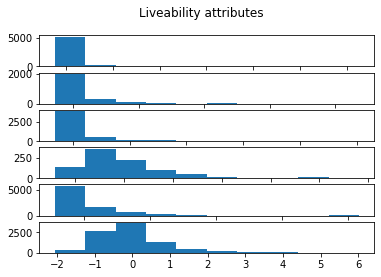

In [50]:
import matplotlib.pyplot as plt
X_scaled = scaler.transform(X_train)
X_scaled
fig, axs = plt.subplots(X_scaled.shape[1])
fig.suptitle('Liveability attributes')
for i in range(0, X_scaled.shape[1]):
    axs[i].hist(X_scaled[:,i])
plt.show()

<b>QQ-plot</b>
<br>
- In QQ-plot, there are strong evidences that most of liveability attributes are not normally distributed.
<br>
- 6th attribute has normal distribution but it is under-dispersed (more concentrated around a central value).
<br>
- Therefore, it is not recommanded to standardise using normal distribution.

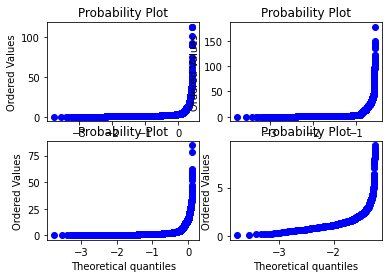

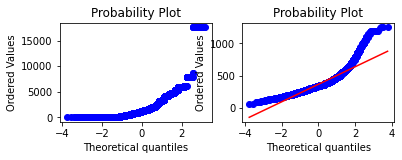

In [51]:
import numpy as np
import scipy.stats as stats
import pylab

# test = np.random.normal(0,1, 1000) # Good example
for i in range(0, 4):
    ax1 = plt.subplot(221+i)
    measurements = sample[COL[i]].to_numpy()
    stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()
pylab.show()

for i in range(4, X_scaled.shape[1]):
    ax1 = plt.subplot(217+i)
    measurements = sample[COL[i]].to_numpy()
    stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()


QQ-plot expanded <b>(Log-model)</b>
- Relatively, it doesn't seem to fit well.

<ipython-input-52-702ffdf512ce>:7: RuntimeWarning: invalid value encountered in log
  sm.qqplot(np.log(test), line='45')


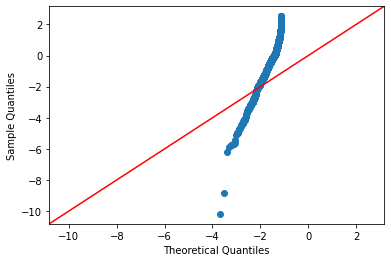

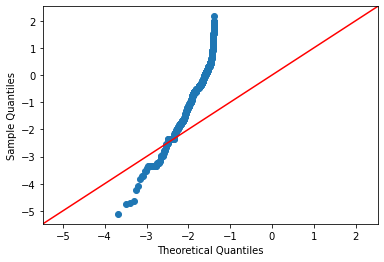

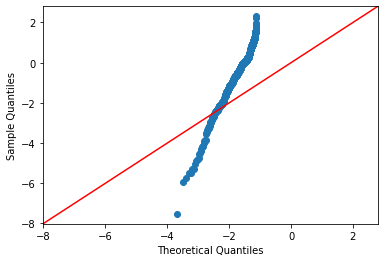

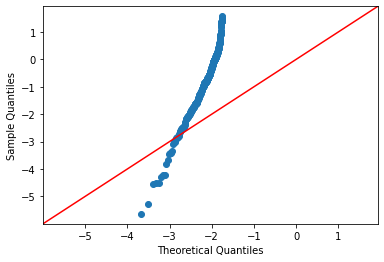

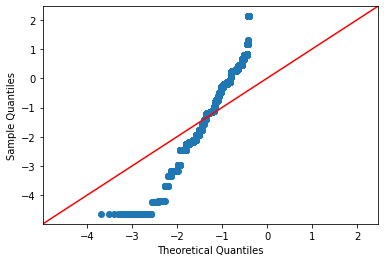

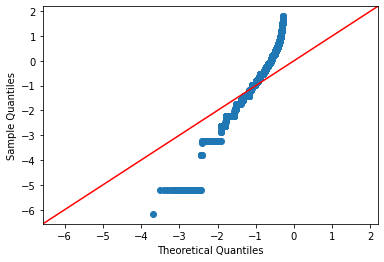

In [52]:
import numpy as np 
import statsmodels.api as sm
import pylab

for i in range(0, X_scaled.shape[1]):
    test = X_scaled[:,i]
    sm.qqplot(np.log(test), line='45')
pylab.show()
    

## Ranking
- As the attributes are not nomally distributed, it is decided to use ranking to score the liveability

In [69]:
COLS = ["residence_type","address","sa2_2021",
        'min_distance_to_poli', 'crime_cases',  'min_distance_to_prim',
       'min_distance_to_second', 'min_distance_to_train',
       'min_distance_to_hosp','min_distance_to_park',
       'min_distance_to_cbd', 'min_distance_to_shop']
COL = [
        'min_distance_to_poli', 'crime_cases',  'min_distance_to_prim',
       'min_distance_to_second', 'min_distance_to_train',
       'min_distance_to_hosp','min_distance_to_park',
       'min_distance_to_cbd', 'min_distance_to_shop']

In [85]:
ranking = pd.DataFrame()
for col in COLS:
    if col not in ["address","sa2_2021","residence_type"]:
        ranking[col] = sample[col].rank(ascending=False)
    else:
        ranking[col] = sample[col]
ranking

,residence_type,address,sa2_2021,min_distance_to_poli,crime_cases,min_distance_to_prim,min_distance_to_second,min_distance_to_train,min_distance_to_hosp,min_distance_to_park,min_distance_to_cbd,min_distance_to_shop
0,House,"- CHAPEL HILL ROAD, BOOROLITE",204011057,256.0,7706.0,492.0,469.0,88.0,432.0,205.0,738.0,NaN
1,House,"- LOWER NEWRY ROAD, NEWRY",205051101,983.0,8129.5,560.0,894.0,747.0,813.0,1053.0,757.0,NaN
2,House,". NASH STREET, JAMIESON",204011057,4692.0,7706.0,7969.0,176.0,29.0,172.0,1144.0,613.0,NaN
3,House,".5528 CALDER HIGHWAY, BIG HILL",202011022,NaN,4066.0,300.5,632.5,531.5,NaN,NaN,1667.5,NaN
4,Apartment,"010/903 DANDENONG ROAD, MALVERN EAST",208041195,NaN,2544.0,3561.5,1329.5,2111.5,NaN,5069.5,6191.5,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...
8567,House,"UNIT 3/11 YARRAM CRESCENT, CLAYTON",212051568,2707.0,2983.5,2080.0,1852.0,3390.0,1598.0,5393.0,4787.0,NaN
8568,House,"UNIT/2/19 TOPPING STREET, SALE",205051103,3748.0,2314.5,2192.0,4314.0,5070.0,NaN,3334.0,845.0,NaN
8569,House,"VILLA 25/1 GREG NORMAN DRIVE, COCOROC",213051368,403.0,335.5,217.0,537.0,428.0,655.0,560.0,3761.0,NaN
8570,Apartment,"WHITELAW STREET, MEENIYAN",205031087,4617.0,7591.0,7756.0,389.0,5180.0,386.0,5650.0,1517.0,NaN


In [86]:
COL

['min_distance_to_poli',
 'crime_cases',
 'min_distance_to_prim',
 'min_distance_to_second',
 'min_distance_to_train',
 'min_distance_to_hosp',
 'min_distance_to_park',
 'min_distance_to_cbd',
 'min_distance_to_shop']

In [87]:
for col in COL:
    ranking[col] = ranking[col]/len(ranking[col])
score = ranking
score

,residence_type,address,sa2_2021,min_distance_to_poli,crime_cases,min_distance_to_prim,min_distance_to_second,min_distance_to_train,min_distance_to_hosp,min_distance_to_park,min_distance_to_cbd,min_distance_to_shop
0,House,"- CHAPEL HILL ROAD, BOOROLITE",204011057,0.029865,0.898973,0.057396,0.054713,0.010266,0.050397,0.023915,0.086094,NaN
1,House,"- LOWER NEWRY ROAD, NEWRY",205051101,0.114676,0.948378,0.065329,0.104293,0.087144,0.094844,0.122842,0.088311,NaN
2,House,". NASH STREET, JAMIESON",204011057,0.547364,0.898973,0.929655,0.020532,0.003383,0.020065,0.133458,0.071512,NaN
3,House,".5528 CALDER HIGHWAY, BIG HILL",202011022,NaN,0.474335,0.035056,0.073787,0.062004,NaN,NaN,0.194529,NaN
4,Apartment,"010/903 DANDENONG ROAD, MALVERN EAST",208041195,NaN,0.296780,0.415481,0.155098,0.246325,NaN,0.591402,0.722294,0.010208
...,...,...,...,...,...,...,...,...,...,...,...,...
8567,House,"UNIT 3/11 YARRAM CRESCENT, CLAYTON",212051568,0.315796,0.348052,0.242650,0.216052,0.395474,0.186421,0.629141,0.558446,NaN
8568,House,"UNIT/2/19 TOPPING STREET, SALE",205051103,0.437238,0.270007,0.255716,0.503266,0.591461,NaN,0.388941,0.098577,NaN
8569,House,"VILLA 25/1 GREG NORMAN DRIVE, COCOROC",213051368,0.047014,0.039139,0.025315,0.062646,0.049930,0.076412,0.065329,0.438754,NaN
8570,Apartment,"WHITELAW STREET, MEENIYAN",205031087,0.538614,0.885558,0.904806,0.045380,0.604293,0.045030,0.659123,0.176972,NaN


## Scoring

In [88]:
def liveability_scoring(scores, cols, weights):
    """Takes score data, list of weights and column names, return the total liveability score based on the weights"""
    # check the validation of weight list
    if len(weights) != len(cols):
        return np.nan
    #if sum(weights) != 1:
        #return np.nan
    
    # initialize the values
    scores["total_liveability_score"] = 0

    # calculate the total liveability
    for i, rows in scores.iterrows():
        list_sum = 0
        for n in range(0, len(cols)):
            if not np.isnan(scores.loc[i, cols[n]]):
                list_sum = list_sum + (scores.loc[i, cols[n]]*weights[n])
        scores.loc[i, "total_liveability_score"] = list_sum
    return scores

Cacluate customized liveability

In [89]:
sum(weights)

1.0000000000000002

In [90]:
weights = [1/9, 1/9, 1/9,1/9, 1/9, 1/9,1/9, 1/9, 1/9]
total_score = liveability_scoring(score, COL, weights)

In [91]:
total_score

,residence_type,address,sa2_2021,min_distance_to_poli,crime_cases,min_distance_to_prim,min_distance_to_second,min_distance_to_train,min_distance_to_hosp,min_distance_to_park,min_distance_to_cbd,min_distance_to_shop,total_liveability_score
0,House,"- CHAPEL HILL ROAD, BOOROLITE",204011057,0.029865,0.898973,0.057396,0.054713,0.010266,0.050397,0.023915,0.086094,NaN,0.134624
1,House,"- LOWER NEWRY ROAD, NEWRY",205051101,0.114676,0.948378,0.065329,0.104293,0.087144,0.094844,0.122842,0.088311,NaN,0.180646
2,House,". NASH STREET, JAMIESON",204011057,0.547364,0.898973,0.929655,0.020532,0.003383,0.020065,0.133458,0.071512,NaN,0.291660
3,House,".5528 CALDER HIGHWAY, BIG HILL",202011022,NaN,0.474335,0.035056,0.073787,0.062004,NaN,NaN,0.194529,NaN,0.093301
4,Apartment,"010/903 DANDENONG ROAD, MALVERN EAST",208041195,NaN,0.296780,0.415481,0.155098,0.246325,NaN,0.591402,0.722294,0.010208,0.270843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8567,House,"UNIT 3/11 YARRAM CRESCENT, CLAYTON",212051568,0.315796,0.348052,0.242650,0.216052,0.395474,0.186421,0.629141,0.558446,NaN,0.321337
8568,House,"UNIT/2/19 TOPPING STREET, SALE",205051103,0.437238,0.270007,0.255716,0.503266,0.591461,NaN,0.388941,0.098577,NaN,0.282801
8569,House,"VILLA 25/1 GREG NORMAN DRIVE, COCOROC",213051368,0.047014,0.039139,0.025315,0.062646,0.049930,0.076412,0.065329,0.438754,NaN,0.089393
8570,Apartment,"WHITELAW STREET, MEENIYAN",205031087,0.538614,0.885558,0.904806,0.045380,0.604293,0.045030,0.659123,0.176972,NaN,0.428864


Write csv of output(Liveability)

In [92]:
import os
new_path = "../../data/curated/scoring/"

if not os.path.exists(new_path):
    os.makedirs(new_path)

total_score =total_score.sort_values(by=['total_liveability_score'], ascending=False)
total_score.to_csv(new_path+"liveability-scoring.csv")

## Analysis based on SA2
### Ranking

In [93]:
total_score

,residence_type,address,sa2_2021,min_distance_to_poli,crime_cases,min_distance_to_prim,min_distance_to_second,min_distance_to_train,min_distance_to_hosp,min_distance_to_park,min_distance_to_cbd,min_distance_to_shop,total_liveability_score
5769,Apartment,"4/950 HEIDELBERG KINGLAKE ROAD, HURSTBRIDGE",209031210,0.510149,0.852893,0.923122,0.499067,0.570345,NaN,0.871092,0.477018,NaN,0.522632
5825,Apartment,"404/6 BRUCE STREET, BOX HILL",207031163,0.493350,0.391332,0.686771,0.598227,0.660406,0.233901,0.890457,0.624475,0.099743,0.519851
913,Apartment,"105/8 BRUCE STREET, BOX HILL",207031163,0.491484,0.391332,0.677555,0.595194,0.662039,0.232851,0.892324,0.624125,0.099160,0.518452
4470,Apartment,"3/137 PRINCES STREET, FLEMINGTON",206031115,0.515866,0.226610,0.916239,0.644657,0.499533,NaN,0.887541,0.957653,NaN,0.516455
340,House,"1/245 BLUFF ROAD, SANDRINGHAM",208011173,0.308329,0.768899,0.879025,0.642674,0.285114,0.261083,0.891857,0.610593,NaN,0.516397
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,House,"115 VAUGHAN DRIVE, SUTTON",215031400,0.054071,NaN,0.022224,0.026890,0.046955,0.008224,0.058621,0.033539,NaN,0.027836
7980,Apartment,"8/202 GOOLABRI DRIVE, SUTTON",215031400,0.054071,NaN,0.022224,0.026890,0.046955,0.008224,0.058621,0.033539,NaN,0.027836
1607,House,"134 READ ROAD, SUTTON",215031400,0.054071,NaN,0.022224,0.026890,0.046955,0.008224,0.058621,0.033539,NaN,0.027836
1951,House,"151 BIDGES ROAD, SUTTON",215031400,0.054071,NaN,0.022224,0.026890,0.046955,0.008224,0.058621,0.033539,NaN,0.027836


In [94]:
df = total_score
sa2_name = pd.read_csv('../../data/curated/sa2_vic_2021.csv')

In [95]:
sa2_name.columns

Index(['Unnamed: 0', 'SA2_NAME21', 'SA2_CODE21'], dtype='object')

In [96]:
df2 = df[['sa2_2021', 'total_liveability_score','address']]\
        .groupby(['sa2_2021'],as_index = False) \
        .agg(
            {\
                'total_liveability_score': 'mean', # count number of instances from sample
                'address': 'count',
            }
        ) \
        .rename({'address': 'num','total_liveability_score': 'averaged_total_liveability_score' }, axis=1)


In [97]:
df2 = df2.sort_values(by=['averaged_total_liveability_score'], ascending=False)
df2.head()

,sa2_2021,averaged_total_liveability_score,num
220,209031210,0.461980,5
118,206031115,0.455258,29
375,213031352,0.444948,61
147,206071142,0.439554,41
110,206011496,0.437077,28


In [98]:
# top 10 liveable suburb
df3 = df2.merge(sa2_name, how="left",left_on="sa2_2021",right_on = "SA2_CODE21").drop(columns = ['Unnamed: 0','SA2_CODE21'])
df3.head(10)

,sa2_2021,averaged_total_liveability_score,num,SA2_NAME21
0,209031210,0.461980,5,Hurstbridge
1,206031115,0.455258,29,Flemington
2,213031352,0.444948,61,Yarraville
3,206071142,0.439554,41,Fitzroy
4,206011496,0.437077,28,Brunswick - South
5,206051128,0.431515,77,Albert Park
6,213031348,0.425879,45,Footscray
7,206071518,0.423804,22,Richmond - North
8,213021341,0.422669,29,Altona
9,206021500,0.420596,17,Northcote - West


In [99]:
# top 10 liveable address
rank = total_score[['address', 'sa2_2021','total_liveability_score']].head(10)
rank = rank.merge(sa2_name, how="left",left_on="sa2_2021",right_on = "SA2_CODE21").drop(columns = ['Unnamed: 0','SA2_CODE21'])
rank.head(10)

,address,sa2_2021,total_liveability_score,SA2_NAME21
0,"4/950 HEIDELBERG KINGLAKE ROAD, HURSTBRIDGE",209031210,0.522632,Hurstbridge
1,"404/6 BRUCE STREET, BOX HILL",207031163,0.519851,Box Hill
2,"105/8 BRUCE STREET, BOX HILL",207031163,0.518452,Box Hill
3,"3/137 PRINCES STREET, FLEMINGTON",206031115,0.516455,Flemington
4,"1/245 BLUFF ROAD, SANDRINGHAM",208011173,0.516397,Sandringham - Black Rock
5,"141 VICTORIA STREET, FLEMINGTON",206031115,0.516391,Flemington
6,"6/49 FARNHAM STREET, FLEMINGTON",206031115,0.513500,Flemington
7,"1/3 HIGH STREET, DIMBOOLA",215011390,0.513351,Nhill Region
8,"67/50 KING WILLIAM STREET, FITZROY",206071142,0.512826,Fitzroy
9,"1/816 HEIDELBERG KINGLAKE ROAD, HURSTBRIDGE",209031210,0.511510,Hurstbridge


### Web Experiments